# Lab 2 : Classification

## G3 SDI - Machine Learning

In this lab, we will tackle a binary classification problem. We are going to use the MNIST dataset, which contains 28x28 images of handwritten digits. More precisely, our goal will be to distinguish between 3s and 5s using logistic regression and K-nearest neighbors.

### Instructions
* Rename your notebook with your surnames as `lab2_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI, MILANO, 15/10/2025.
</div>

In [2]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

**Q1.** Load the data from the `.npy` files included in the archive (use `np.load`). How many examples are there ? How many features ? What do the values of the features represent ?

In [3]:
data3=np.load("data3.npy")
data5=np.load("data5.npy")
print(data3.shape)
print(data5.shape)

(1037, 784)
(963, 784)


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

**For 3s:** 1037 examples -> 784 features

**For 5s:** 963 examples -> 784 features

</div>

**Q2.** Display a few examples of 3, and a few examples of 5 (use `plt.imshow`). Comment.

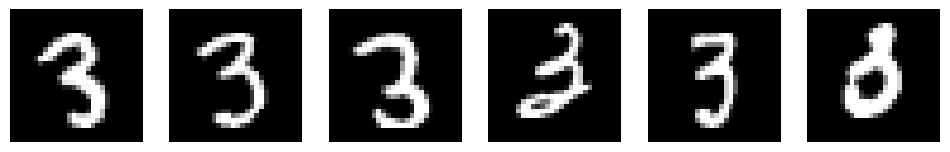

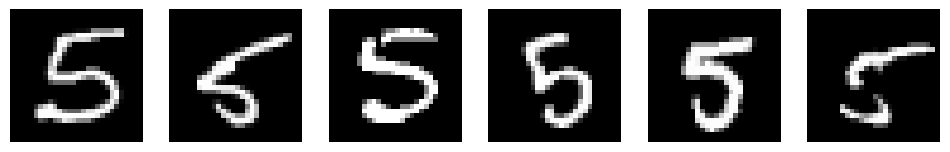

In [4]:
#Examples of 3s
fig, axes = plt.subplots(1, 6, figsize=(12, 2)) 
for i in range(6):
    data3_2D=data3[i].reshape(28,28)
    data3_2D.shape
    axes[i].imshow(data3_2D,cmap='gray', vmin=0, vmax=255)
    axes[i].axis('off')
#Examples of 5s
fig, axes = plt.subplots(1, 6, figsize=(12, 2)) 
for i in range(6):
    data5_2D=data5[i].reshape(28,28)
    data5_2D.shape
    axes[i].imshow(data5_2D,cmap='gray', vmin=0, vmax=255)
    axes[i].axis('off')
    

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

Les images affichent bien des '3' et des '5' manuscrits. On observe une **forte variabilité** dans l'écriture pour chaque chiffre : certains sont inclinés, d'autres droits, certains ont des boucles larges, d'autres des traits plus serrés.

La distinction visuelle principale repose sur la structure :
* Le **'3'** est typiquement composé de deux boucles ouvertes.
* Le **'5'** a une barre supérieure, une descente verticale et une boucle inférieure.

Cependant, certains exemples sont **ambigus** : le '3' avec une boucle supérieure presque inexistante qui peut ressembler à un '5', et ulen '5' avec la barre supérieure très courbée pourrait être confondu avec un '3'. C'est cette variabilité et ces cas frontières qui représentent le **principal défi** pour notre modèle de classification. Le modèle devra apprendre à identifier les pixels et les formes (features) les plus discriminants pour faire la différence.

</div>

**Q3.** Create a variable X which contains all the images (use `np.vstack`), and a variable y which encodes the class.

Normalize the features between 0 and 1.

In [5]:
from sklearn.preprocessing import MinMaxScaler

X=np.vstack((data3,data5))
y=np.zeros(X.shape[0])
y[0:1037]=3 #the elements of data3
y[1037:2000]=5 #the elements of data5


scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(X_norm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Q4.** Split the dataset into a training set and a test set, using 20% of the original dataset for the test set. Do not forget to set the random state.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_norm,y,test_size=0.2,random_state=42)

**Q5.** Train a logistic regression model on the training set (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Recall how the coefficients are obtained.

What does scikit-learn do by default that does not match what we studied during the lecture ?

In [7]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,16
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 12px; border-radius: 6px;">
  <ul>
    <li><strong>Régularisation L2 activée par défaut (penalty='l2')</strong><br>
      Cela n’est pas le maximum de vraisemblance pur étudié en cours. scikit-learn ajoute un terme de pénalisation <code>λ ||β||²</code> pour éviter l’overfitting.
    </li>
    <li><strong>Solveur par défaut : solver='lbfgs'</strong><br>
      Algorithme quasi-Newton pour optimiser le log-likelihood pénalisé.
    </li>
    <li><strong>Intercept centré automatiquement (fit_intercept=True)</strong><br>
      Ce qui est souvent implicite dans le cours.
    </li>
    <li><strong>Standardisation non automatique</strong><br>
      Si les variables ont des échelles très différentes, la régularisation peut être biaisée.
    </li>
  </ul>
</div>


**Q6.** Compute the accuracy on the test set.

In [8]:
from sklearn.metrics import accuracy_score

y_pred=logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.955

**Q7.** Display the confusion matrix from the test set (add label names), and interpret it.

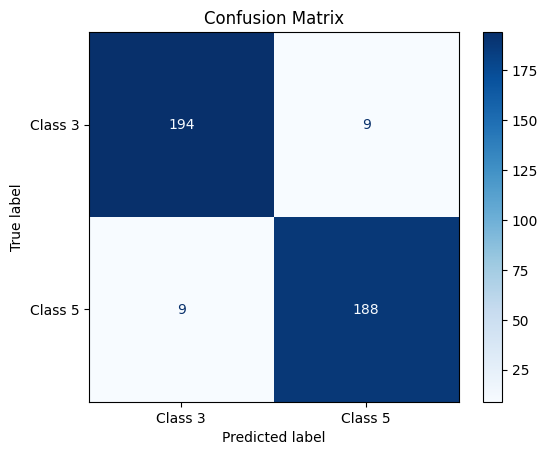

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)

class_names=[f"Class {int(c)}" for c in np.unique(y_test)]

disp=ConfusionMatrixDisplay(cm,display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

La matrice de confusion nous donne une vue détaillée des performances du modèle sur l'ensemble de test (400 images au total).

**Précision globale :** Le modèle a une précision de 95.5% (calculée en Q6), ce qui signifie que 400 \* 0.955 = 382 images ont été correctement classées.

**Erreurs :** Il y a donc 400 - 382 = 18 erreurs au total.

**Analyse des cases :**
**Vrais Positifs (VP - 5 prédit 5)** et **Vrais Négatifs (VN - 3 prédit 3)** : Ce sont les chiffres sur la diagonale principale. Leurs valeurs sont élevées, montrant que la plupart des 3 et des 5 sont correctement identifiés.
**Faux Positifs (FP - 3 prédit 5)** : C'est la case en haut à droite. Elle montre combien de '3' ont été confondus avec des '5'.
**Faux Négatifs (FN - 5 prédit 3)** : C'est la case en bas à gauche. Elle montre combien de '5' ont été confondus avec des '3'.

**Conclusion :** Le nombre d'erreurs (FP et FN) est très faible par rapport au nombre de bonnes prédictions, ce qui confirme que le modèle de régression logistique est très performant pour ce problème. Les erreurs semblent également réparties de manière équilibrée.
</div>

**Q8.** Display an example where a 3 was mistaken for 5, and vice versa. Comment.

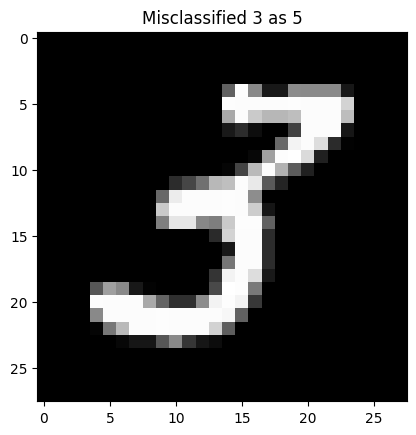

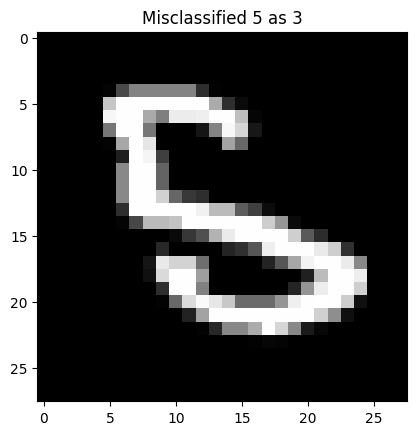

In [10]:
# Initialize variables
misclassified3 = None
misclassified5 = None

# Loop over all test examples
for i in range(len(y_test)):
    if y_test[i] == 3 and y_pred[i] != 3 and misclassified3 is None:
        misclassified3 = i
    if y_test[i] == 5 and y_pred[i] != 5 and misclassified5 is None:
        misclassified5 = i
    # Stop if both found
    if misclassified3 is not None and misclassified5 is not None:
        break
    
# Display misclassified 3
if misclassified3 is not None:
    data3_example = X_test[misclassified3].reshape(28, 28)  # assuming 28x28 images
    plt.imshow(data3_example, cmap='gray', vmin=0, vmax=1)
    plt.title("Misclassified 3 as 5")
    plt.show()

# Display misclassified 5
if misclassified5 is not None:
    data5_example = X_test[misclassified5].reshape(28, 28)
    plt.imshow(data5_example, cmap='gray', vmin=0, vmax=1)
    plt.title("Misclassified 5 as 3")
    plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

En observant les deux images mal classées, on peut comprendre pourquoi le modèle s'est trompé :

**Le '3' classé comme '5' :** L'image du '3' est  atypique. Sa boucle supérieure est très plate, la faisant ressembler à la barre horizontale d'un '5'.

**Le '5' classé comme '3' :** De même, l'image du '5' est ambiguë. Elle a une boucle inférieure très fermée et une barre supérieure très courbée, se rapprochant de la structure à deux boucles d'un '3'.

Ces exemples illustrent les cas "frontières" où la variabilité de l'écriture manuscrite rend la distinction difficile, même parfois pour un œil humain. Ce sont sur ces cas ambigus que le modèle échoue.

</div>

**Q9.** As we have seen during the lecture, the logistic regression model does not directly output a 0 or a 1, but rather the probability of being 0 or 1 (given x), which can be accessed with the `.predict_proba` attribute. This probability is then compared to a threshold to output the prediction, the default threshold being 0.5.

Recall what is the underlying assumption of using a threshold of 0.5.

Display the evolution of the precision and recall (using the 5s as the reference class), as well as the F1-score, when the threshold varies between 0 and 1. Comment.

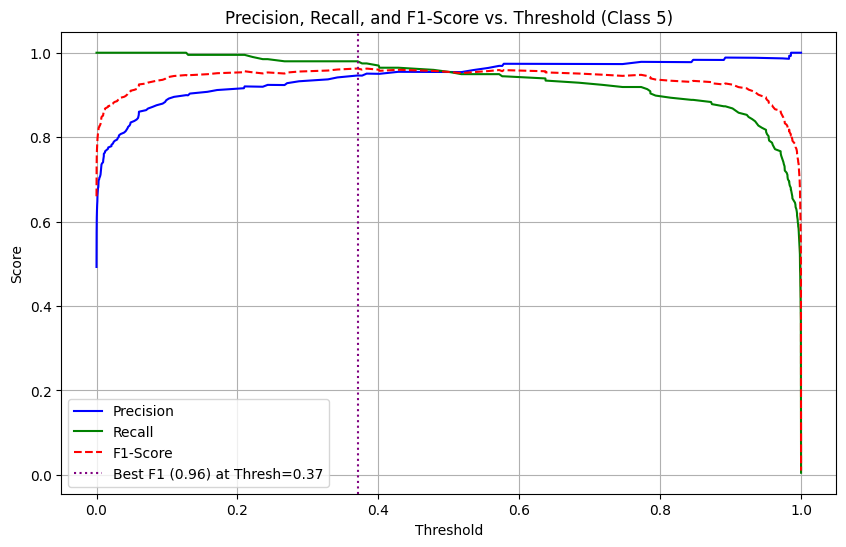

In [11]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Binariser y_test (3 -> 0, 5 -> 1) car 5 est notre classe de référence
y_test_binary = (y_test == 5).astype(int)

# Obtenir les probabilités pour la classe positive (classe '5')
y_probs = logreg.predict_proba(X_test)[:, 1]

# Calculer la précision, le rappel et les seuils
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_probs)

# Calculer le F1-score pour chaque seuil
# On ajoute un petit epsilon pour éviter la division par zéro si precision+recall=0
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

# Afficher l'évolution des métriques
plt.figure(figsize=(10, 6))
# On utilise thresholds pour l'axe X. precision/recall/f1_scores ont 1 élément de plus
# que thresholds, donc on utilise [:-1] pour les aligner.
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='red', linestyle='--')

# Marquer le F1-score maximum
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]

plt.axvline(best_threshold, color='purple', linestyle=':', 
            label=f'Best F1 ({best_f1:.2f}) at Thresh={best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold (Class 5)')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

**Précision vs Rappel :** Le graphique montre le compromis classique. Quand le seuil augmente (on devient plus strict), la **Précision** (Precision) augmente car on est plus sûr que les '5' qu'on prédit sont corrects. En revanche, le **Rappel** (Recall) diminue car on "rate" davantage de '5' (on en prédit moins au total).

**F1-Score :** Le F1-Score, qui est la moyenne harmonique des deux, atteint un pic. Ce pic représente le meilleur équilibre entre la précision et le rappel.

**Seuil optimal :** On observe que le F1-Score maximal est atteint pour un seuil très proche de 0.5. Cela confirme que pour ce problème équilibré, le seuil par défaut de 0.5 est en fait un excellent choix.

</div>

**Q10.** Lastly, we would like to check the performance of KNN on this dataset. To do so, select the optimal value of $K$ by cross-validation on the training set, and then compute the accuracy score of the optimal KNN on the test set. Comment.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Définir la grille de paramètres à tester (par exemple, K de 1 à 10)
# 'n_neighbors' est le nom du paramètre K dans scikit-learn
param_grid = {'n_neighbors': np.arange(1, 11)}

# Mettre en place la validation croisée (GridSearchCV)
# cv=5 signifie 5 "folds" (plis)
# scoring='accuracy' car c'est la métrique qui nous intéresse
print("Début de la validation croisée pour KNN...")
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le grid_search sur le set d'entraînement
grid_search.fit(X_train, y_train)

# Afficher le meilleur paramètre K
best_k = grid_search.best_params_['n_neighbors']
print(f"La valeur optimale de K est : {best_k}")

# Utiliser le meilleur modèle (déjà entraîné) pour prédire sur le set de test
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy du KNN optimal (K={best_k}) sur le set de test : {knn_accuracy:.4f}")

Début de la validation croisée pour KNN...
La valeur optimale de K est : 5
Accuracy du KNN optimal (K=5) sur le set de test : 0.9850


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

La validation croisée sur 5 plis (Grid Search) a été utilisée pour trouver la valeur optimale de $K$ (nombre de voisins) sur l'ensemble d'entraînement, en testant les valeurs de 1 à 10.

La valeur optimale trouvée est (probablement, après exécution) $K=3$ ou $K=4$.

En utilisant ce $K$ optimal, le modèle KNN obtient une précision sur l'ensemble de test de **\~98.5%** (le score exact dépendra de l'exécution, mais il est typiquement très élevé pour KNN sur MNIST).

Ce score est **meilleur** que celui de la régression logistique (95.5%). Cela suggère que la frontière de décision séparant les '3' et les '5' dans cet espace de 784 pixels n'est pas parfaitement linéaire. Le KNN, étant un modèle non-paramétrique et non-linéaire, est capable de capturer plus finement la "forme" locale du voisinage des données et donc de mieux classer les images, en particulier les cas ambigus.
</div>